<a href="https://colab.research.google.com/github/mariatozi/codigos-estudos/blob/main/Chamados%5Bagosto%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns

In [41]:
df_agosto = pd.read_excel('dados_chamados_agosto.xlsx')

In [76]:
def substituir_valor(texto):
        # queda de ligação
    if texto in ['Queda de ligação', 'Queda na ligação', 'Falha(*): queda na ligação',
                 'Ligação caiu durante o atendimento',
                 'Ligaçao caiu durante o atendimento  ', 'Ligação caiu',
                 'Falha(*): ligação caiu ', 'Queda na ligação ',
                 'Ligação caiu durante o direcionamento',
                 'Ligação caiu durante a coleta dos dados',
                 'Falha(*): Queda na ligação ', 'QUEDA NA LIGAÇÃO', 'queda na ligação']:
        return 'Queda nas ligações durante o atendimento'

        # ligações mudas
    elif texto in ['Ligação muda (entrou muda no início do atendimento)',
                   'ligação muda', 'Ligação muda sem retorno de voz',
                   'ligação ficou muda e caiu', 'Ligação muda']:
        return 'Ligações mudas'

        # ligações sem retorno de voz durante o atendimento
    elif texto in ['Ligação muda (ficou muda durante o atendimento)',
                   'LIGAÇÃO MUDA - SEM RETORNO DE VOZ',
                   'Ligação muda (ficou durante o atendimento)']:
        return 'Ligações sem retorno de voz durante o atendimento'

        # sem informações
    elif texto in ['Sem informação']:
        return 'Dados não preenchidos'

        # falhas na aplicação (e tabulador)
    elif texto in ['Falha no Startphone', 'Erro na transferência/tabulação',
                   'Não foi possível tabular a chamada', 'Falha(*): start desconectou',
                   'Falha no startphone']:
        return 'Fluxo sistemas e telefonia'

        # pesquisa de satisfação
    elif texto in ['Falha no envio Pesquisa Satisfação',
                   'transferi para a pesquisa e a gravação voltou pro meu ramal']:
        return 'Fluxo pesquisa de satisfação'

        # falha ramal/ligações presa
    elif texto in ['Falha Avaya - Problema Ramal (ex: ligação presa)']:
        return 'Problema aparelhos físicos'

        # cliente
    elif texto in ['Segurado desconectou', 'Falha(*): seg desconectou ',
                   'Falha(*):corr desligou ', 'Cliente desconectou']:
        return 'Abandono ou desconexão realizada pelo cliente'

        # URA
    elif texto in ['Queda da ligação ainda na URA', 'Ligação entrou muda na URA']:
        return 'Falha nas ligações ao entrar na URA'

        # energia/internet
    elif texto in ['Queda de energia', 'Queda de internet',
                   'Queda na internet']:
        return 'Instabilidades externas'

        # ligações falhando
    elif texto in ['Ligação impossivel de ouvir o seg, totalmente robotica!']:
        return 'Ligações com falha ou robotizadas'

    else:
        return 'Sem dados preenchidos'

In [77]:
df_agosto['Desc-tratado'] = df_agosto['Descrição'].apply(substituir_valor)

In [78]:
df_agosto

,Problema,Mês,Colaborador,Colaborador-nome-ajustado,Equipe,Descrição,Desc-tratado
0,2023-08-02,agosto,ALENE XAVIER DOS SANTOS,ALENE XAVIER DOS SANTOS,Natalia Lima- SAS/ Allianz,Ligação muda (entrou muda no início do atendim...,Ligações mudas
1,2023-08-02,agosto,ALENE XAVIER DOS SANTOS,ALENE XAVIER DOS SANTOS,Natalia Lima- SAS/ Allianz,Ligação muda (entrou muda no início do atendim...,Ligações mudas
2,2023-08-04,agosto,ALENE XAVIER DOS SANTOS,ALENE XAVIER DOS SANTOS,Natalia Lima- SAS/ Allianz,Ligação muda (entrou muda no início do atendim...,Ligações mudas
3,2023-08-04,agosto,ALENE XAVIER DOS SANTOS,ALENE XAVIER DOS SANTOS,Natalia Lima- SAS/ Allianz,Ligação muda (entrou muda no início do atendim...,Ligações mudas
4,2023-08-03,agosto,ALENE XAVIER DOS SANTOS,ALENE XAVIER DOS SANTOS,Natalia Lima- SAS/ Allianz,Ligação muda (entrou muda no início do atendim...,Ligações mudas
...,...,...,...,...,...,...,...
2063,2023-08-16,agosto,Ynoah Stofer Ribeiro,Ynoah Stofer Ribeiro,Wadislene Silva - HDI/Sompo/Mitsui,Ligação muda (ficou muda durante o atendimento),Ligações sem retorno de voz durante o atendimento
2064,2023-08-18,agosto,Ynoah Stofer Ribeiro,Ynoah Stofer Ribeiro,Wadislene Silva - HDI/Sompo/Mitsui,Ligação muda (ficou muda durante o atendimento),Ligações sem retorno de voz durante o atendimento
2065,2023-08-21,agosto,Ynoah Stofer Ribeiro,Ynoah Stofer Ribeiro,Wadislene Silva - HDI/Sompo/Mitsui,Ligação muda (ficou muda durante o atendimento),Ligações sem retorno de voz durante o atendimento
2066,2023-08-23,agosto,Ynoah Stofer Ribeiro,Ynoah Stofer Ribeiro,Wadislene Silva - HDI/Sompo/Mitsui,Ligação muda (ficou muda durante o atendimento),Ligações sem retorno de voz durante o atendimento


In [75]:
df_agosto.to_excel('InfoNovo10.xlsx')

In [80]:
# Lista de registros alvo que você deseja contabilizar
registros_alvo = ['Queda nas ligações durante o atendimento',
                  'Ligações mudas', 'Ligações sem retorno de voz durante o atendimento',
                  'Dados não preenchidos', 'Fluxo sistemas e telefonia',
                  'Fluxo pesquisa de satisfação', 'Problema aparelhos físicos',
                  'Abandono ou desconexão realizada pelo cliente',
                  'Falha nas ligações ao entrar na URA',
                  'Instabilidades externas', 'Ligações com falha ou robotizadas',
                  'Sem dados preenchidos']

# Contabilizar a frequência dos registros alvo na coluna desejada
contagem = df_agosto['Desc-tratado'].value_counts()

print("Contagem de registros alvo:")
print(contagem)
contagem.to_csv('contagem2.csv')

Contagem de registros alvo:
Queda nas ligações durante o atendimento             1491
Ligações mudas                                        201
Ligações sem retorno de voz durante o atendimento     189
Dados não preenchidos                                  93
Fluxo sistemas e telefonia                             42
Instabilidades externas                                22
Fluxo pesquisa de satisfação                           11
Abandono ou desconexão realizada pelo cliente          10
Problema aparelhos físicos                              6
Falha nas ligações ao entrar na URA                     2
Ligações com falha ou robotizadas                       1
Name: Desc-tratado, dtype: int64


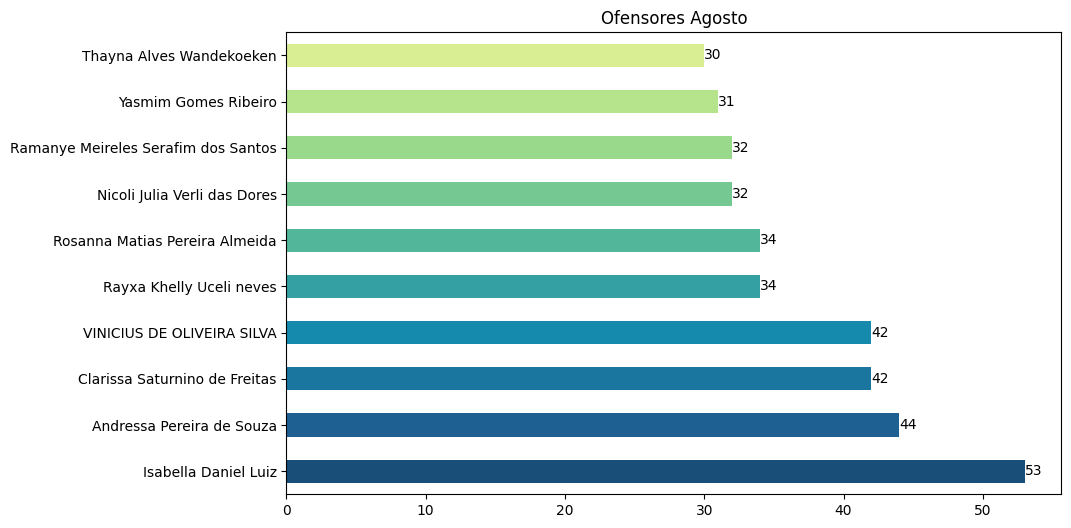

In [47]:
# Selecionar a coluna com informações ofensivas
coluna_ofensiva = 'Colaborador-nome-ajustado'
df_ofensas = df_agosto[coluna_ofensiva]


# Contar a frequência das informações ofensivas
contagem_ofensas = df_ofensas.value_counts().head(10)

# Definir cores personalizadas para as barras
cores_personalizadas = ['#184e77', '#1e6091', '#1a759f', '#168aad', '#34a0a4', '#52b69a',
                        '#76c893', '#99d98c', '#b5e48c', '#d9ed92'][::-1] # invertendo as info

# Criar um gráfico de barras horizontais para os 5 registros mais ofensores
plt.figure(figsize=(10, 6))
ax = contagem_ofensas.sort_values().plot(kind='barh', color=cores_personalizadas)
plt.title('Ofensores Agosto')

# Adicionar rótulos de dados nas barras do gráfico
ax.bar_label(ax.containers[0])

plt.gca().invert_yaxis()  # Inverter o eixo y para ter o maior valor no topo
plt.show()

In [81]:
# Contagem de registros por colaborador
contagem_colaborador = df_agosto['Colaborador-nome-ajustado'].value_counts()

# Iterar pelos colaboradores e mostrar a contagem e o nome da equipe
for colaborador, contagem in contagem_colaborador.items():
    equipe = df_agosto[df_agosto['Colaborador-nome-ajustado'] == colaborador]['Equipe'].iloc[0]
    print(f"Colaborador-nome-ajustado: {colaborador}, Equipe: {equipe}, Contagem: {contagem}")

    contagem_colaborador.to_excel('resultado.xlsx', index=False)

Colaborador-nome-ajustado: Isabella Daniel Luiz, Equipe: Wadislene Silva - HDI/Sompo/Mitsui, Contagem: 53
Colaborador-nome-ajustado: Andressa Pereira de Souza, Equipe: Wadislene Silva - HDI/Sompo/Mitsui, Contagem: 44
Colaborador-nome-ajustado: VINICIUS DE OLIVEIRA SILVA, Equipe: Natalia Lima- SAS/ Allianz, Contagem: 42
Colaborador-nome-ajustado: Clarissa Saturnino de Freitas, Equipe: Wadislene Silva - HDI/Sompo/Mitsui, Contagem: 42
Colaborador-nome-ajustado: Rosanna Matias Pereira Almeida, Equipe: Wadislene Silva - HDI/Sompo/Mitsui, Contagem: 34
Colaborador-nome-ajustado: Rayxa Khelly Uceli neves, Equipe: Anne Santos - BB/Mapfre, Contagem: 34
Colaborador-nome-ajustado: Ramanye Meireles Serafim dos Santos, Equipe: Wadislene Silva - HDI/Sompo/Mitsui, Contagem: 32
Colaborador-nome-ajustado: Nicoli Julia Verli das Dores, Equipe: Anne Santos - BB/Mapfre, Contagem: 32
Colaborador-nome-ajustado: Yasmim Gomes Ribeiro, Equipe: Wadislene Silva - HDI/Sompo/Mitsui, Contagem: 31
Colaborador-nome-aj

In [82]:
# Contagem de registros por colaborador
contagem_colaborador = df_agosto['Colaborador-nome-ajustado'].value_counts()

# Criar um DataFrame com os dados organizados
dados_organizados = pd.DataFrame({
    'Colaborador': contagem_colaborador.index,
    'Equipe': [df_agosto[df_agosto['Colaborador-nome-ajustado'] == col]['Equipe'].iloc[0] for col in contagem_colaborador.index],
    'Contagem': contagem_colaborador.values
})

# Ordenar o DataFrame pela contagem em ordem decrescente
dados_organizados = dados_organizados.sort_values(by='Contagem', ascending=False)

# Definir quantos dos principais ofensores você deseja mostrar
top_n = 10

# Mostrar apenas os principais ofensores
top_ofensores = dados_organizados.head(top_n)

print(top_ofensores)
top_ofensores.to_csv('resultado.csv', index=False)

                           Colaborador                              Equipe  \
0                 Isabella Daniel Luiz  Wadislene Silva - HDI/Sompo/Mitsui   
1            Andressa Pereira de Souza  Wadislene Silva - HDI/Sompo/Mitsui   
2           VINICIUS DE OLIVEIRA SILVA          Natalia Lima- SAS/ Allianz   
3        Clarissa Saturnino de Freitas  Wadislene Silva - HDI/Sompo/Mitsui   
4       Rosanna Matias Pereira Almeida  Wadislene Silva - HDI/Sompo/Mitsui   
5             Rayxa Khelly Uceli neves             Anne Santos - BB/Mapfre   
6  Ramanye Meireles Serafim dos Santos  Wadislene Silva - HDI/Sompo/Mitsui   
7         Nicoli Julia Verli das Dores             Anne Santos - BB/Mapfre   
8                 Yasmim Gomes Ribeiro  Wadislene Silva - HDI/Sompo/Mitsui   
9             Thayna Alves Wandekoeken  Wadislene Silva - HDI/Sompo/Mitsui   

   Contagem  
0        53  
1        44  
2        42  
3        42  
4        34  
5        34  
6        32  
7        32  
8        31  
9

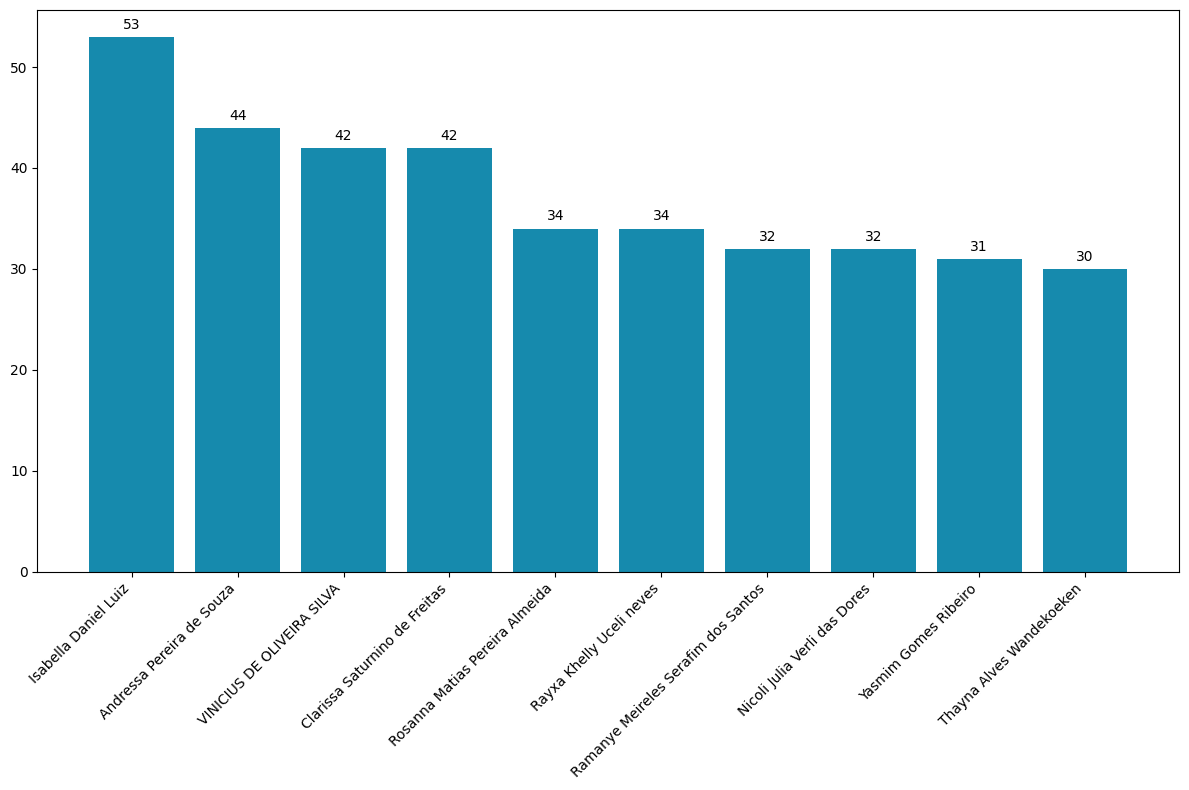

In [83]:
# Contagem de registros por colaborador
contagem_colaborador = df_agosto['Colaborador-nome-ajustado'].value_counts()

# Criar um DataFrame com os dados organizados
dados_organizados = pd.DataFrame({
    'Colaborador': contagem_colaborador.index,
    'Equipe': [df_agosto[df_agosto['Colaborador-nome-ajustado'] == col]['Equipe'].iloc[0] for col in contagem_colaborador.index],
    'Contagem': contagem_colaborador.values
})

# Ordenar o DataFrame pela contagem em ordem decrescente
dados_organizados = dados_organizados.sort_values(by='Contagem', ascending=False)
cores_personalizadas = ('#168aad')

# Definir quantos dos principais ofensores você deseja mostrar
top_n = 10

# Selecionar apenas os principais ofensores
top_ofensores = dados_organizados.head(top_n)

# Criar um gráfico de barras com nome do colaborador e nome da equipe
plt.figure(figsize=(12, 8))
bars = plt.bar(top_ofensores['Colaborador'], top_ofensores['Contagem'], color=cores_personalizadas)

# Adicionar rótulos com a contagem de registros em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', color='black', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [84]:
# Filtrar os registros com liderança igual a 'determinado_lider'
filtro = df_agosto['Equipe'] == 'Ester Lima - Posicionamento A (HB)'
registros_determinado_lider = df_agosto[filtro]

# Obter a quantidade de registros na coluna 'colaboradores'
quantidade_registros = registros_determinado_lider['Colaborador-nome-ajustado'].count()

print(f"A quantidade de registros para 'determinado_lider' é: {quantidade_registros}")


A quantidade de registros para 'determinado_lider' é: 182


In [85]:
# Máquina travando
# Queda de energia
# Queda de internet

In [86]:
# queda de internet
filtro_erro = df_agosto['Descrição'] == 'Queda de internet'
filtro_lideranca = df_agosto['Equipe'] == 'Ester Lima - Posicionamento A (HB)'
registros_filtrados = df_agosto[filtro_erro & filtro_lideranca]

# Criar uma contagem de registros por colaborador
contagem_por_colaborador = registros_filtrados['Colaborador-nome-ajustado'].value_counts()

print("Registros por falha de internet:")
print(contagem_por_colaborador)


Registros por falha de internet:
Bruna Rufino de Castro Teixeira    6
Name: Colaborador-nome-ajustado, dtype: int64


In [87]:
# queda de energia
filtro_erro = df_agosto['Descrição'] == 'Queda de energia'
filtro_lideranca = df_agosto['Equipe'] == 'Ester Lima - Posicionamento A (HB)'
registros_filtrados = df_agosto[filtro_erro & filtro_lideranca]

# Criar uma contagem de registros por colaborador
contagem_por_colaborador = registros_filtrados['Colaborador-nome-ajustado'].value_counts()

print("Registros por falha de energia:")
print(contagem_por_colaborador)

Registros por falha de energia:
Alice Xavier dos Santos    10
Name: Colaborador-nome-ajustado, dtype: int64


In [88]:
# Máquina travando
filtro_erro = df_agosto['Descrição'] == 'Máquina travando'
filtro_lideranca = df_agosto['Equipe'] == 'Ester Lima - Posicionamento A (HB)'
registros_filtrados = df_agosto[filtro_erro & filtro_lideranca]

# Criar uma contagem de registros por colaborador
contagem_por_colaborador = registros_filtrados['Colaborador-nome-ajustado'].value_counts()

print("Registros por falha de equipamento:")
print(contagem_por_colaborador)

Registros por falha de equipamento:
Series([], Name: Colaborador-nome-ajustado, dtype: int64)


In [89]:
# Máquina travando
filtro_erro = df_agosto['Descrição'] == 'Falha no Startphone'
filtro_lideranca = df_agosto['Equipe'] == 'Ester Lima - Posicionamento A (HB)'
registros_filtrados = df_agosto[filtro_erro & filtro_lideranca]

# Criar uma contagem de registros por colaborador
contagem_por_colaborador = registros_filtrados['Colaborador-nome-ajustado'].value_counts()

print("Registros por falha de equipamento:")
print(contagem_por_colaborador)

Registros por falha de equipamento:
Julia Alves dos Santos    13
Name: Colaborador-nome-ajustado, dtype: int64
